In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#check missing values
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['education']=imputer.fit_transform(data['education'].values.reshape(-1,1))

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [11]:
data.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
data['education'].values.reshape(-1,1).shape

(4240, 1)

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data.iloc[:,:-1]=imputer.fit_transform(data.iloc[:,:-1].values)

In [15]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\Users\AMIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

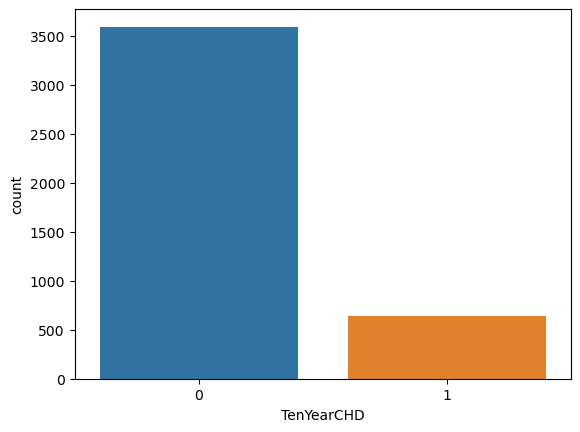

In [16]:
sns.countplot(data['TenYearCHD'])

In [17]:
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [25]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

## Under Sampling 

### Tomeklinks

In [26]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

print('sample Before undersampling ',Counter(train_y))

"""
majority : resample only majority class
all:resample all class
not majority:resample all classes except majority 
not minority :resample all classes except minority 
"""
rl=TomekLinks(sampling_strategy='majority')
n_train_x,n_train_y=rl.fit_resample(train_X,train_y)

print('sample After undersampling ',Counter(n_train_y))


sample Before undersampling  Counter({0: 2874, 1: 518})
sample After undersampling  Counter({0: 2714, 1: 518})


## Over Sampling 

### SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
print("Samples Before OverSampling ",Counter(train_y))
sm=SMOTE()
n_train_X,n_train_y=sm.fit_resample(train_X,train_y)

print("Samples After OverSampling ",Counter(n_train_y))


Samples Before OverSampling  Counter({0: 2874, 1: 518})
Samples After OverSampling  Counter({0: 2874, 1: 2874})


### SMOTE-TOMEK LINK

In [28]:
from imblearn.combine import SMOTETomek
print("Samples Before OverSampling ",Counter(train_y))
sm=SMOTETomek()
n_train_X,n_train_y=sm.fit_resample(train_X,train_y)

print("Samples After OverSampling ",Counter(n_train_y))


Samples Before OverSampling  Counter({0: 2874, 1: 518})
Samples After OverSampling  Counter({0: 2842, 1: 2842})


## Model 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(n_train_X,n_train_y)

KNeighborsClassifier()

In [31]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
y_pred=model.predict(test_X)
print(accuracy_score(test_y,y_pred))
print(f1_score(test_y,y_pred))
print(recall_score(test_y,y_pred))
print(precision_score(test_y,y_pred))

0.6379716981132075
0.26378896882494
0.4365079365079365
0.18900343642611683


C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
